In [22]:
from sklearn.neighbors import KNeighborsClassifier as kNC
from sklearn.tree import DecisionTreeClassifier as DTC

# Boosting
from sklearn.ensemble import AdaBoostClassifier as AdaC
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt

import numpy as np

# import dataset packages
from sklearn import datasets
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification, make_gaussian_quantiles, make_hastie_10_2
from sklearn.model_selection import train_test_split

# import from project files
from utils import plot_2d, plot_classifier_boundary, test_model
from plots import plot_test_training_err, plot_test_training_auc, plot_tree_compare
from evaluation import dt_classifier_auc, dt_classifier_score, get_auc_gbc_trees, get_auc_ada_trees

## Dataset Generation ## 

### Decision Trees ###
Advantages:
- Good with High Level Data: e.g. age, income

Disadvantages:
- Bad with Low Level Data: data with many predictors/inputs
- Trees can overfit: Overfitting increases with depth of tree


### Tree Boosting (ADA) ###

- gradient boosting may not be a good choice if you have a lot of noise, as it can result in overfitting
- Boosting is based on weak learners (high bias, low variance). In terms of decision trees, weak learners are shallow trees, sometimes even as small as decision stumps (trees with two leaves). Boosting reduces error mainly by reducing bias (and also to some extent variance, by aggregating the output from many models).

In [23]:
def data_dt():

    X, y = make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    y = y % 2 # to reduce the amount of different labels to 2

    return X, y

In [24]:
def data_tb():
    
    # dt 75/ tb 85
    X, y = make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )

    # X, y = make_hastie_10_2(n_samples=1000, random_state=1)

    return X, y

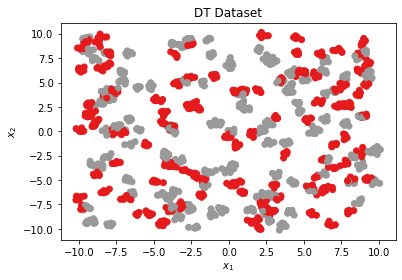

In [25]:
# Decision Tree data generation and splitup
dt_X, dt_y = data_dt()
plot_2d(dt_X, dt_y, 'Dataset DT - Decision Tree ')
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, test_size=.33, random_state=42)

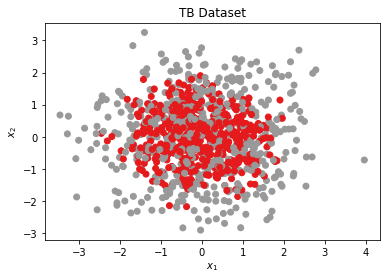

In [26]:
# TB data generation and splitup
tb_X, tb_y = data_tb()
plot_2d(tb_X, tb_y, 'Dataset TB - Tree Boosting')
tb_X_train, tb_X_test, tb_y_train, tb_y_test = train_test_split(tb_X, tb_y, test_size=.33, random_state=42)

## Evaluation and Plotting Methods ##

In [27]:

#  Underfitting – Validation and training error high
#  Overfitting – Validation error is high, training error low
#  Good fit – Validation error low, slightly higher than the training error
#  Unknown fit - Validation error low, training error 'high'


## Hyperparameters ##

In [28]:
# Hyperparameters

criterion = 'entropy'
# min_samples_split best between [2, 40] (see https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)
# if value too small trees tend to overfit
# Imbalanced class problem: because then regions in which the minority class will be in majority 
# will be very small so min_samples_split should be lower
# Decision Tree
min_samples_split_dt = 2
min_samples_split_tb = 10
nsamples = np.arange(2, 60, 2)
max_depth_dt = None
max_depth_tb = 40
ndepth = np.arange(1, 60, 5)

# Tree Boosting
ntree=np.array([1,2,3,5,10,20,30,40,50, 100, 200,300])
nrates = np.arange(0.01, 2, 0.2)


## Decision Tree Dataset ##
### Comprare Performance DT and TB ###

Decision Trees on DT Dataset:
AUC score: 0.856
AUC score list: [0.868939171319424, 0.8636951115764675, 0.8619860661367873, 0.8465129946454225, 0.8521242897263406, 0.8347035172594143, 0.8645846937442861, 0.8806442641188404, 0.8284601821921833, 0.856670584778137]


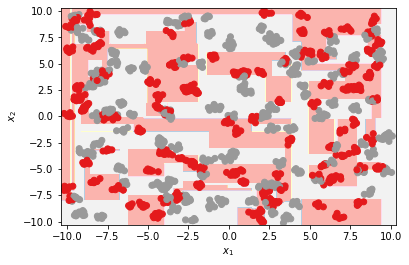

[Text(0.4954231798338262, 0.9814814814814815, 'X[0] <= 9.442\nentropy = 1.0\nsamples = 1005\nvalue = [504, 501]'),
 Text(0.48641036473736093, 0.9444444444444444, 'X[0] <= -9.52\nentropy = 1.0\nsamples = 988\nvalue = [504, 484]'),
 Text(0.2812279960568934, 0.9074074074074074, 'X[1] <= -8.035\nentropy = 0.48\nsamples = 29\nvalue = [26, 3]'),
 Text(0.2722151809604281, 0.8703703703703703, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2902408111533587, 0.8703703703703703, 'X[0] <= -9.755\nentropy = 0.371\nsamples = 28\nvalue = [26, 2]'),
 Text(0.2812279960568934, 0.8333333333333334, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.299253626249824, 0.8333333333333334, 'X[0] <= -9.72\nentropy = 0.619\nsamples = 13\nvalue = [11, 2]'),
 Text(0.2902408111533587, 0.7962962962962963, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3082664413462893, 0.7962962962962963, 'X[1] <= -7.115\nentropy = 0.414\nsamples = 12\nvalue = [11, 1]'),
 Text(0.299253626249824, 0.7592592592592

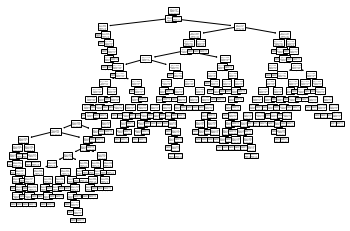

In [29]:
# Decision Trees

dtree=DTC(criterion=criterion, max_depth=max_depth_dt, min_samples_split=min_samples_split_dt)

print('Decision Tree Performance on Dataset DT:')
test_model(dtree, dt_X, dt_y)
plot_tree(dtree)

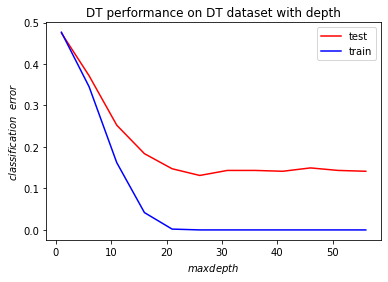

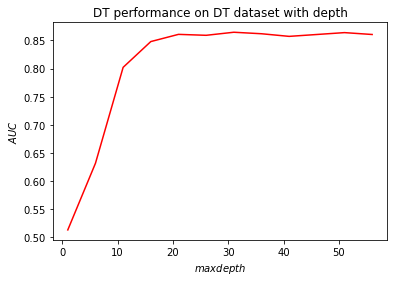

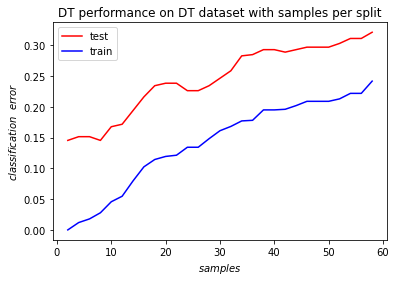

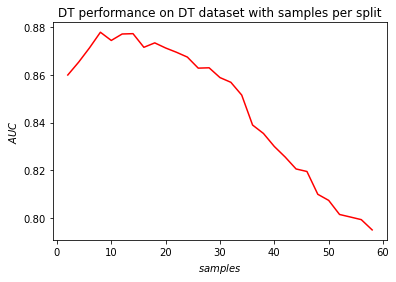

In [30]:
# Decision Tree Hyperparam Tuning
errors = map(lambda depth: dt_classifier_score(
    dt_X_train, dt_y_train, 
    dt_X_test, dt_y_test, 
    max_depth=depth,
    min_samples_split=min_samples_split_dt), ndepth)
plot_test_training_err(ndepth, errors, title='DT performance on DT dataset with depth', hyperparam='max depth')

aucs = map(lambda depth: dt_classifier_auc(dt_X, dt_y, max_depth=depth, min_samples_split=min_samples_split_dt), ndepth)
plot_test_training_auc(ndepth, aucs, title='DT performance on DT dataset with depth', hyperparam='max depth')


errors = map(lambda sample: dt_classifier_score(
    dt_X_train, dt_y_train, 
    dt_X_test, dt_y_test, 
    max_depth=max_depth_dt, 
    min_samples_split=sample), nsamples)
plot_test_training_err(nsamples, errors, title='DT performance on DT dataset with samples per split', hyperparam='samples')

aucs = map(lambda sample: dt_classifier_auc(dt_X, dt_y, max_depth=max_depth_dt, min_samples_split=sample), nsamples)
plot_test_training_auc(nsamples, aucs, title='DT performance on DT dataset with samples per split', hyperparam='samples')


Tree Boosting on DT dataset:
AUC score: 0.597
AUC score list: [0.5929450369155045, 0.6254500818330606, 0.6134567014013654, 0.6042448979591837, 0.6018518518518519, 0.5804461124950833, 0.596454955543933, 0.5743265306122449, 0.586635127143702, 0.5978835978835979]


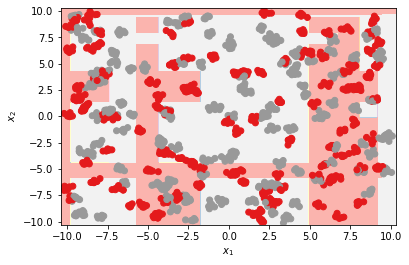

In [31]:
# Tree Boosting - ADA
ada = AdaC(n_estimators=25)
print('Tree Boosting ADA Performance Dataset DT:')
test_model(ada, dt_X, dt_y)

Tree Boosting with GBC on DT dataset:
AUC score: 0.630
AUC score list: [0.6229795918367347, 0.6095846801841512, 0.6732365145228216, 0.6545234750220538, 0.6317551020408163, 0.6189281511506276, 0.6812193126022913, 0.6102857142857143, 0.5864181396412584, 0.6086956521739131]


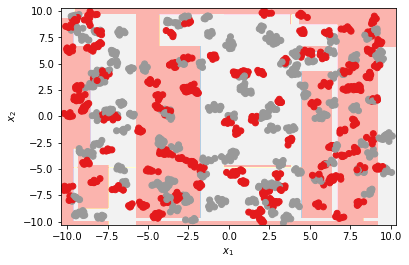

In [32]:
# Tree Boosting - Gradient Boost

gbc = GBC(n_estimators=20)

print('Tree Boosting GBC Performance on Dataset DT:')
test_model(gbc, dt_X, dt_y)

Comparison on Decision Tree Dataset:


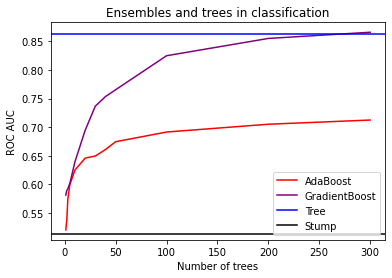

In [33]:
print('Comparison on Decision Tree Dataset:')

auc_ada_tree = map(lambda tree: get_auc_ada_trees(tree, dt_X, dt_y), ntree)
# auc_ada_tree = list(lambda tree: get_auc_ada_trees(tree, dt_X, dt_y, max_depth=max_depth_dt, min_samples_split=min_samples_split_dt), ntree)
auc_gbc_tree = map(lambda tree: get_auc_gbc_trees(tree, dt_X, dt_y), ntree)
# auc_gbc_tree = list(lambda tree: get_auc_gbc_trees(tree, dt_X, dt_y, max_depth=max_depth_dt, min_samples_split=min_samples_split_dt), ntree)
auc_tree = dt_classifier_auc(dt_X, dt_y, max_depth=None, min_samples_split=min_samples_split_dt)

plot_tree_compare(ntree, auc_ada_tree, auc_gbc_tree, auc_tree)

## Dataset TB ##
### Compare Performance DT and TB ###

Decision Tree on TB Dataset:
AUC score: 0.777
AUC score list: [0.7787878787878789, 0.7709215419167188, 0.7862340362340363, 0.7406487917907978, 0.7814247865763909, 0.7993828294331583, 0.7783088235294118, 0.7333603896103896, 0.7851011876133043, 0.8127457826454482]
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


[Text(0.5147357723577236, 0.9736842105263158, 'X[4] <= 1.315\nentropy = 1.0\nsamples = 670\nvalue = [339, 331]'),
 Text(0.3480691056910569, 0.9210526315789473, 'X[2] <= -1.807\nentropy = 0.993\nsamples = 599\nvalue = [329, 270]'),
 Text(0.25863821138211385, 0.868421052631579, 'X[4] <= 0.994\nentropy = 0.229\nsamples = 27\nvalue = [1, 26]'),
 Text(0.22611788617886178, 0.8157894736842105, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.29115853658536583, 0.8157894736842105, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4375, 0.868421052631579, 'X[5] <= 1.669\nentropy = 0.984\nsamples = 572\nvalue = [328, 244]'),
 Text(0.3561991869918699, 0.8157894736842105, 'X[0] <= 1.706\nentropy = 0.971\nsamples = 543\nvalue = [326, 217]'),
 Text(0.29115853658536583, 0.7631578947368421, 'X[6] <= 1.905\nentropy = 0.953\nsamples = 517\nvalue = [324, 193]'),
 Text(0.25863821138211385, 0.7105263157894737, 'X[6] <= -1.28\nentropy = 0.937\nsamples = 501\nvalue = [324, 177]'),
 Text(0.0650

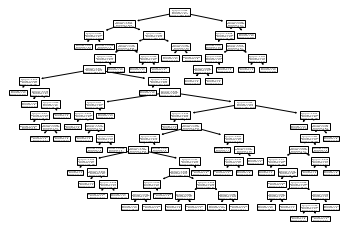

In [34]:
# Decision Trees

dtree=DTC(criterion=criterion, max_depth=max_depth_tb, min_samples_split=min_samples_split_tb)

print('Decision Tree on TB Dataset:')
test_model(dtree, tb_X, tb_y)
# plot_roc_curve(dtree, tb_X_test, tb_y_test)

# dtree.fit(tb_X_train, tb_y_train)
# print('DT score: %.2f' % (dtree.score(tb_X_test, tb_y_test)))
# plot_classifier_boundary(dtree, tb_X, tb_y, title='DT on TB dataset')
plot_tree(dtree)

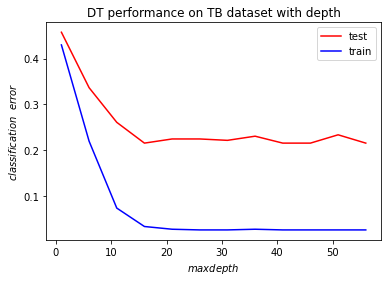

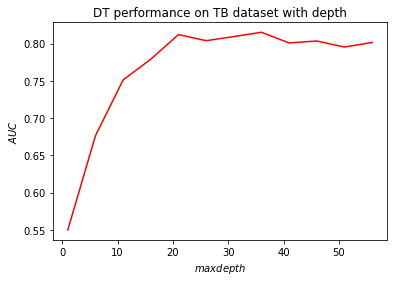

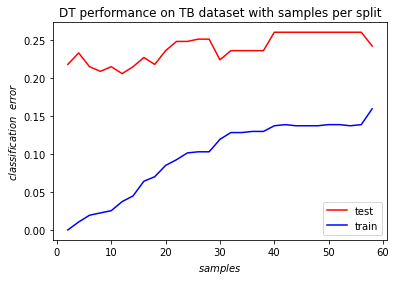

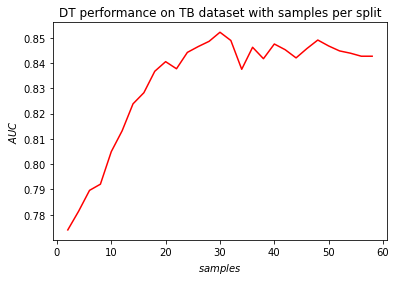

In [35]:
# DT Hyperparam Tuning

errors = map(lambda depth: dt_classifier_score(
    tb_X_train, tb_y_train, 
    tb_X_test, tb_y_test, 
    max_depth=depth,
    min_samples_split=min_samples_split_tb), ndepth)
plot_test_training_err(ndepth, errors, title='DT performance on TB dataset with depth', hyperparam='max depth')

aucs = map(lambda depth: dt_classifier_auc(tb_X, tb_y, max_depth=depth, min_samples_split=min_samples_split_tb), ndepth)
plot_test_training_auc(ndepth, aucs, title='DT performance on TB dataset with depth', hyperparam='max depth')


errors = map(lambda sample: dt_classifier_score(
    tb_X_train, tb_y_train, 
    tb_X_test, tb_y_test, 
    max_depth=max_depth_tb, 
    min_samples_split=sample), nsamples)

plot_test_training_err(nsamples, errors, title='DT performance on TB dataset with samples per split', hyperparam='samples')

aucs = map(lambda sample: dt_classifier_auc(tb_X, tb_y, max_depth=max_depth_tb, min_samples_split=sample), nsamples)
plot_test_training_auc(nsamples, aucs, title='DT performance on TB dataset with samples per split', hyperparam='samples')


In [36]:
# Tree Boosting

tboost = AdaC()

print('Tree Boosting on TB Dataset:')
test_model(tboost, tb_X, tb_y)

# tboost.fit(tb_X_train, tb_y_train)
# print('TB score: %.2f' % (tboost.score(tb_X_test, tb_y_test)))
# plot_classifier_boundary(tboost, tb_X, tb_y, title='TB on TB dataset')

Tree Boosting on TB Dataset:
AUC score: 0.876
AUC score list: [0.8879665001469292, 0.8658064516129033, 0.8878863611305083, 0.8459558823529413, 0.8787878787878788, 0.8927138176061264, 0.8578119833951728, 0.8849050365526615, 0.8645496025905208, 0.8899911816578483]
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


Comparison on Tree Boost Dataset:


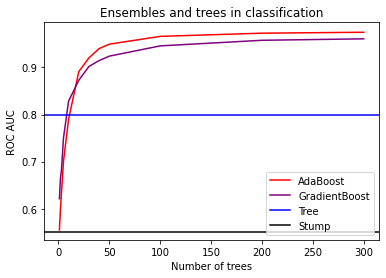

In [37]:
print('Comparison on Tree Boost Dataset:')

auc_ada_tree = map(lambda tree: get_auc_ada_trees(tree, tb_X, tb_y), ntree)
# auc_ada_tree = list(lambda tree: get_auc_ada_trees(tree, tb_X, tb_y, max_depth=max_depth_tb, min_samples_split=min_samples_split_tb), ntree)
auc_gbc_tree = map(lambda tree: get_auc_gbc_trees(tree, tb_X, tb_y), ntree)
# auc_gbc_tree = list(lambda tree: get_auc_gbc_trees(tree, tb_X, tb_y, max_depth=max_depth_tb, min_samples_split=min_samples_split_tb), ntree)
auc_tree = dt_classifier_auc(tb_X, tb_y, max_depth=None, min_samples_split=min_samples_split_tb)
auc_decision_stump = dt_classifier_auc(tb_X, tb_y, max_depth=1, min_samples_split=min_samples_split_tb)

plot_tree_compare(ntree, auc_ada_tree, auc_gbc_tree, auc_tree, auc_decision_stump)